In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
# To avoid the kernel dead state
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [6]:
def plot_curves(hist):
    accuracy = hist.history["accuracy"]
    val_accuracy = hist.history["val_accuracy"]
    loss = hist.history["loss"]
    val_loss = hist.history["val_loss"]
    epochs = range(1, len(accuracy) + 1)

    plt.plot(epochs, accuracy, "r", label="Training accuracy")
    plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
    plt.title("Training and validation accuracy")
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, "r", label="Training loss")
    plt.plot(epochs, val_loss, "b", label="Validation loss")
    plt.title("Training and validation loss")
    plt.legend()
    plt.show()

In [3]:
# path to training and vaildation data
train_dir = "train"
val_dir = "val"
test_dir = "test"

image_size = (150, 150)    # target image size
batch_size = 64

In [4]:
train_datagen = ImageDataGenerator(
                      rotation_range=40,
                      width_shift_range=.2,
                      height_shift_range=.2,
                      shear_range=.2,
                      zoom_range=.2,
                      horizontal_flip=True,
                      fill_mode='nearest'
                  )

train_ds = train_datagen.flow_from_directory(
                                                directory=train_dir,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                target_size=(150, 150), 
                                                seed = 43
                                            )

Found 3019 images belonging to 5 classes.


In [5]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    seed=43,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical',
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    seed=43,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical',
)

Found 649 files belonging to 5 classes.
Found 649 files belonging to 5 classes.


In [12]:
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath='Models/final_model.keras',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [14]:
inputs = keras.Input(shape=(150, 150, 3))
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(32, (3, 3), activation="relu", kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(64, (3, 3), activation="relu", kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(128, (3, 3), activation="relu", kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(256, (3, 3), activation="relu", kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(512, (3, 3), activation="relu", kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation = "relu")(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_10 = keras.Model(inputs, outputs)

In [16]:
model_10.compile(loss="categorical_crossentropy",
             metrics=["accuracy"],
             optimizer="rmsprop")

hist_10 = model_10.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
48/48 [==============================] - 201s 4s/step - loss: 1.1898 - accuracy: 0.5608 - val_loss: 1.2235 - val_accuracy: 0.5023
Epoch 2/20
48/48 [==============================] - 196s 4s/step - loss: 1.0177 - accuracy: 0.6088 - val_loss: 0.9869 - val_accuracy: 0.6240
Epoch 3/20
48/48 [==============================] - 198s 4s/step - loss: 0.9837 - accuracy: 0.6134 - val_loss: 1.0919 - val_accuracy: 0.5439
Epoch 4/20
48/48 [==============================] - 197s 4s/step - loss: 0.9465 - accuracy: 0.6353 - val_loss: 1.0015 - val_accuracy: 0.6425
Epoch 5/20
48/48 [==============================] - 197s 4s/step - loss: 0.9480 - accuracy: 0.6366 - val_loss: 1.0328 - val_accuracy: 0.6610
Epoch 6/20
48/48 [==============================] - 197s 4s/step - loss: 0.9024 - accuracy: 0.6582 - val_loss: 0.8617 - val_accuracy: 0.6764
Epoch 7/20
48/48 [==============================] - 202s 4s/step - loss: 0.8882 - accuracy: 0.6585 - val_loss: 1.0387 - val_accuracy: 0.5978
Epoch 8/20
48

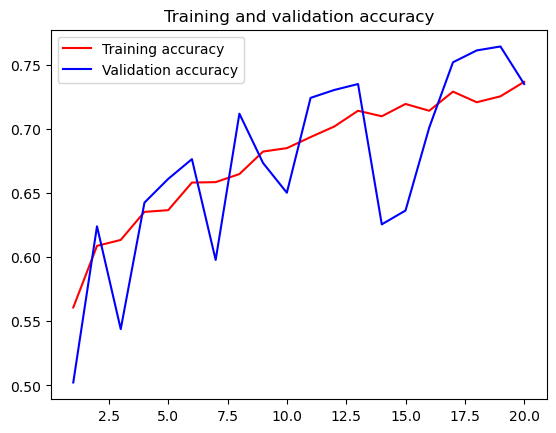

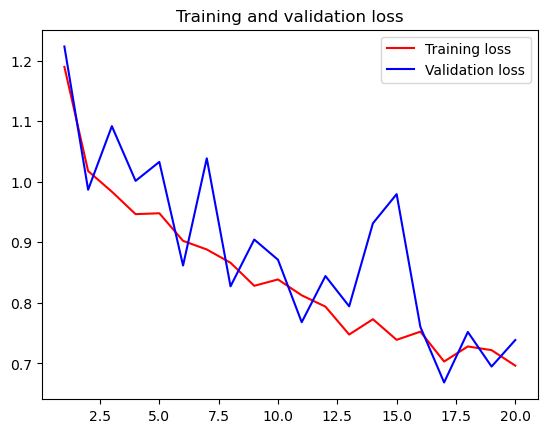

In [17]:
# plot the curves for our base model
plot_curves(hist_10)

In [18]:
model_10.evaluate(test_ds)

11/11 [==============================] - 7s 584ms/step - loss: 0.7531 - accuracy: 0.7227


[0.7531423568725586, 0.7226502299308777]

# Model 11 - Bad

In [27]:
inputs = keras.Input(shape=(150, 150, 3))
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(32, (3, 3), activation="relu", kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(64, (3, 3), activation="relu", kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(128, (3, 3), activation="relu", kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(256, (3, 3), activation="relu", kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(512, (3, 3), activation="relu", kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation = "relu")(x)
x = layers.Dense(512, activation = "relu")(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_11 = keras.Model(inputs, outputs)

In [28]:
model_11.compile(loss="categorical_crossentropy",
             metrics=["accuracy"],
             optimizer="rmsprop")

hist_11 = model_11.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
48/48 [==============================] - 248s 4s/step - loss: 1.7428 - accuracy: 0.2984 - val_loss: 1.5235 - val_accuracy: 0.3544
Epoch 2/20
48/48 [==============================] - 195s 4s/step - loss: 1.5083 - accuracy: 0.3465 - val_loss: 1.4215 - val_accuracy: 0.4022
Epoch 3/20
48/48 [==============================] - 205s 4s/step - loss: 1.3737 - accuracy: 0.3909 - val_loss: 1.3966 - val_accuracy: 0.4176
Epoch 4/20
48/48 [==============================] - 198s 4s/step - loss: 1.2882 - accuracy: 0.4399 - val_loss: 1.2229 - val_accuracy: 0.5116
Epoch 5/20
48/48 [==============================] - 201s 4s/step - loss: 1.2137 - accuracy: 0.4730 - val_loss: 1.2230 - val_accuracy: 0.5146
Epoch 6/20
48/48 [==============================] - 201s 4s/step - loss: 1.2092 - accuracy: 0.5101 - val_loss: 1.1424 - val_accuracy: 0.4884
Epoch 7/20
48/48 [==============================] - 204s 4s/step - loss: 1.1468 - accuracy: 0.5499 - val_loss: 1.1143 - val_accuracy: 0.5639
Epoch 8/20
48

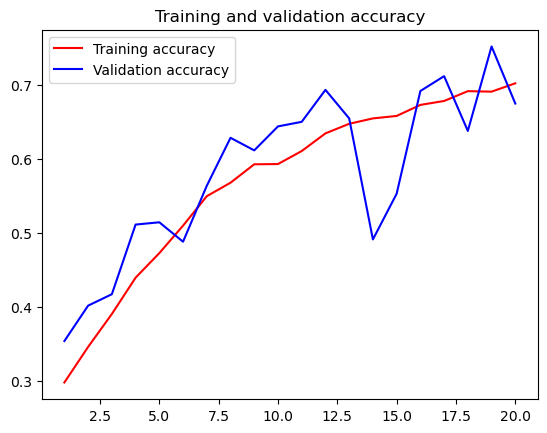

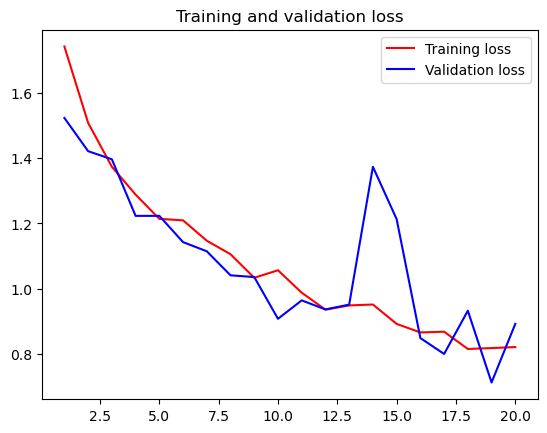

In [29]:
# plot the curves for our base model
plot_curves(hist_11)

In [31]:
model_11.evaluate(test_ds)

11/11 [==============================] - 3s 254ms/step - loss: 0.9447 - accuracy: 0.6549


[0.9447436332702637, 0.6548536419868469]

# Model - 12 - Bad 

In [39]:
inputs = keras.Input(shape=(150, 150, 3))
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(16, (3, 3), activation="relu", kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(32, (3, 3), activation="relu", kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(64, (3, 3), activation="relu", kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(128, (3, 3), activation="relu", kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(256, (3, 3), activation="relu", kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation = "relu")(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_12 = keras.Model(inputs, outputs)

In [40]:
model_12.compile(loss="categorical_crossentropy",
             metrics=["accuracy"],
             optimizer="rmsprop")

hist_12 = model_12.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
48/48 [==============================] - 63s 1s/step - loss: 1.5442 - accuracy: 0.3216 - val_loss: 1.4128 - val_accuracy: 0.4607
Epoch 2/20
48/48 [==============================] - 60s 1s/step - loss: 1.3002 - accuracy: 0.4386 - val_loss: 1.2969 - val_accuracy: 0.4361
Epoch 3/20
48/48 [==============================] - 61s 1s/step - loss: 1.2069 - accuracy: 0.4906 - val_loss: 1.1926 - val_accuracy: 0.5532
Epoch 4/20
48/48 [==============================] - 62s 1s/step - loss: 1.1178 - accuracy: 0.5449 - val_loss: 1.2476 - val_accuracy: 0.5131
Epoch 5/20
48/48 [==============================] - 61s 1s/step - loss: 1.0705 - accuracy: 0.5658 - val_loss: 1.0441 - val_accuracy: 0.6086
Epoch 6/20
48/48 [==============================] - 61s 1s/step - loss: 1.0293 - accuracy: 0.5846 - val_loss: 1.0512 - val_accuracy: 0.6348
Epoch 7/20
48/48 [==============================] - 61s 1s/step - loss: 0.9748 - accuracy: 0.6088 - val_loss: 0.9875 - val_accuracy: 0.6317
Epoch 8/20
48/48 [==

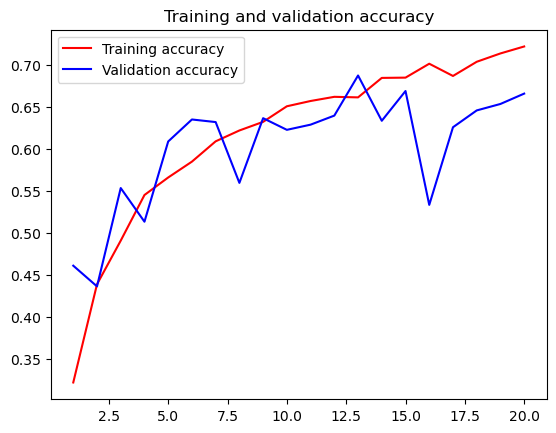

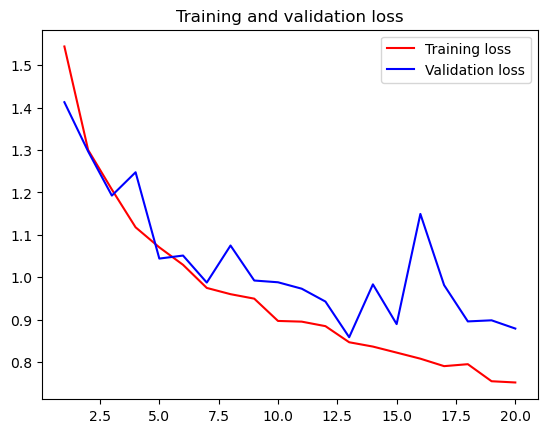

In [41]:
# plot the curves for our base model
plot_curves(hist_12)

In [42]:
model_12.evaluate(test_ds)

11/11 [==============================] - 2s 111ms/step - loss: 0.8875 - accuracy: 0.6857


[0.8875088095664978, 0.6856702566146851]

# Model - 13

In [45]:
inputs = keras.Input(shape=(150, 150, 3))
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(32, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(64, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(128, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(256, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(512, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation = "relu")(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_13 = keras.Model(inputs, outputs)

In [46]:
model_13.compile(loss="categorical_crossentropy",
             metrics=["accuracy"],
             optimizer="rmsprop")

hist_13 = model_13.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
48/48 [==============================] - 110s 2s/step - loss: 1.8731 - accuracy: 0.2620 - val_loss: 1.5660 - val_accuracy: 0.2773
Epoch 2/20
48/48 [==============================] - 113s 2s/step - loss: 1.4223 - accuracy: 0.3972 - val_loss: 1.2366 - val_accuracy: 0.4684
Epoch 3/20
48/48 [==============================] - 110s 2s/step - loss: 1.2568 - accuracy: 0.4654 - val_loss: 1.1679 - val_accuracy: 0.5763
Epoch 4/20
48/48 [==============================] - 109s 2s/step - loss: 1.1789 - accuracy: 0.5230 - val_loss: 1.2278 - val_accuracy: 0.5223
Epoch 5/20
48/48 [==============================] - 110s 2s/step - loss: 1.0946 - accuracy: 0.5677 - val_loss: 1.2320 - val_accuracy: 0.5501
Epoch 6/20
48/48 [==============================] - 110s 2s/step - loss: 0.9938 - accuracy: 0.6194 - val_loss: 1.3169 - val_accuracy: 0.4807
Epoch 7/20
48/48 [==============================] - 112s 2s/step - loss: 0.9818 - accuracy: 0.6313 - val_loss: 1.0758 - val_accuracy: 0.5424
Epoch 8/20
48

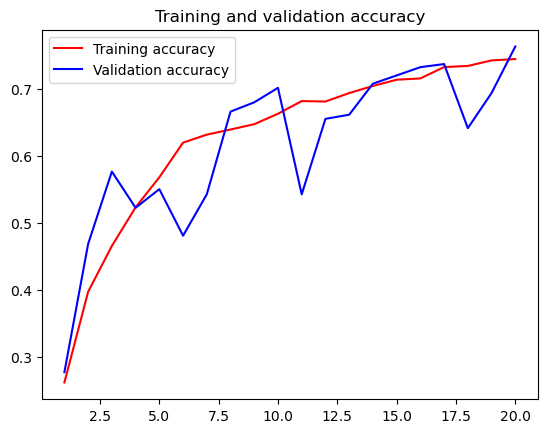

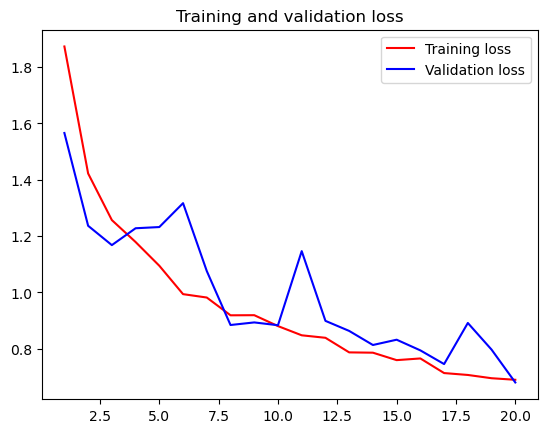

In [47]:
# plot the curves for our base model
plot_curves(hist_13)

In [48]:
model_13.evaluate(test_ds)

11/11 [==============================] - 4s 328ms/step - loss: 0.7135 - accuracy: 0.7720


[0.713458776473999, 0.7719568610191345]

# Model - 14 - Bad

In [49]:
inputs = keras.Input(shape=(150, 150, 3))
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(32, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2(),
                 bias_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(64, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2(),
                 bias_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(128, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2(),
                 bias_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(256, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2(),
                 bias_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(512, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2(),
                 bias_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation = "relu")(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_14 = keras.Model(inputs, outputs)

In [50]:
model_14.compile(loss="categorical_crossentropy",
             metrics=["accuracy"],
             optimizer="rmsprop")

hist_14 = model_14.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
48/48 [==============================] - 212s 4s/step - loss: 2.5224 - accuracy: 0.2627 - val_loss: 1.5546 - val_accuracy: 0.2465
Epoch 2/20
48/48 [==============================] - 202s 4s/step - loss: 1.4379 - accuracy: 0.3783 - val_loss: 1.3271 - val_accuracy: 0.4129
Epoch 3/20
48/48 [==============================] - 193s 4s/step - loss: 1.2839 - accuracy: 0.4564 - val_loss: 1.3537 - val_accuracy: 0.4607
Epoch 4/20
48/48 [==============================] - 193s 4s/step - loss: 1.2016 - accuracy: 0.5128 - val_loss: 1.0226 - val_accuracy: 0.5978
Epoch 5/20
48/48 [==============================] - 199s 4s/step - loss: 1.0829 - accuracy: 0.5654 - val_loss: 1.0622 - val_accuracy: 0.6287
Epoch 6/20
48/48 [==============================] - 199s 4s/step - loss: 1.0286 - accuracy: 0.5939 - val_loss: 1.2366 - val_accuracy: 0.4530
Epoch 7/20
48/48 [==============================] - 197s 4s/step - loss: 0.9739 - accuracy: 0.6350 - val_loss: 1.0716 - val_accuracy: 0.6595
Epoch 8/20
48

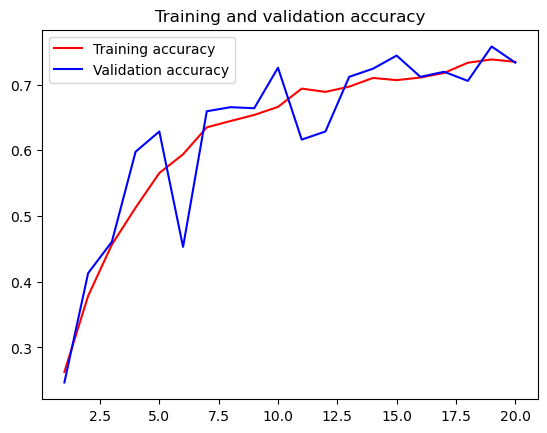

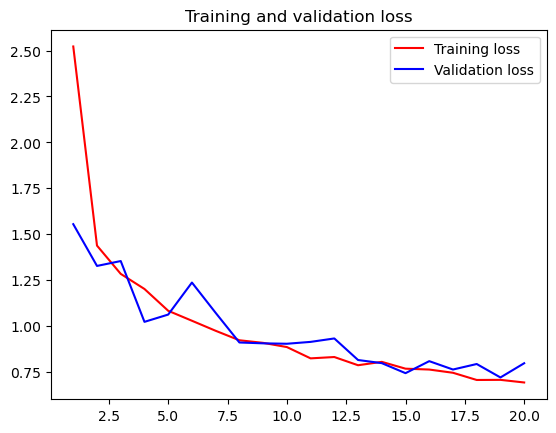

In [51]:
# plot the curves for our base model
plot_curves(hist_14)

In [52]:
model_14.evaluate(test_ds)

11/11 [==============================] - 9s 772ms/step - loss: 0.8208 - accuracy: 0.7350


[0.8207724690437317, 0.7349768877029419]

# Model 15

In [65]:
inputs = keras.Input(shape=(150, 150, 3))
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(32, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(64, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(128, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(256, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(512, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation = "relu", kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_15 = keras.Model(inputs, outputs)

In [66]:
model_15.compile(loss="categorical_crossentropy",
             metrics=["accuracy"],
             optimizer="rmsprop")

hist_15 = model_15.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
48/48 [==============================] - 171s 3s/step - loss: 2.2379 - accuracy: 0.2759 - val_loss: 1.8845 - val_accuracy: 0.1695
Epoch 2/20
48/48 [==============================] - 108s 2s/step - loss: 1.5229 - accuracy: 0.3425 - val_loss: 1.5067 - val_accuracy: 0.3482
Epoch 3/20
48/48 [==============================] - 110s 2s/step - loss: 1.3209 - accuracy: 0.4525 - val_loss: 1.2953 - val_accuracy: 0.4099
Epoch 4/20
48/48 [==============================] - 110s 2s/step - loss: 1.2409 - accuracy: 0.4657 - val_loss: 1.2358 - val_accuracy: 0.5439
Epoch 5/20
48/48 [==============================] - 111s 2s/step - loss: 1.1466 - accuracy: 0.5283 - val_loss: 1.0867 - val_accuracy: 0.5978
Epoch 6/20
48/48 [==============================] - 110s 2s/step - loss: 1.0897 - accuracy: 0.5717 - val_loss: 1.0029 - val_accuracy: 0.6256
Epoch 7/20
48/48 [==============================] - 110s 2s/step - loss: 0.9898 - accuracy: 0.6240 - val_loss: 1.0969 - val_accuracy: 0.5732
Epoch 8/20
48

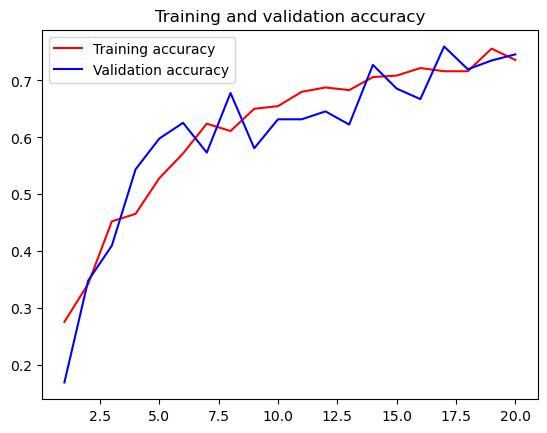

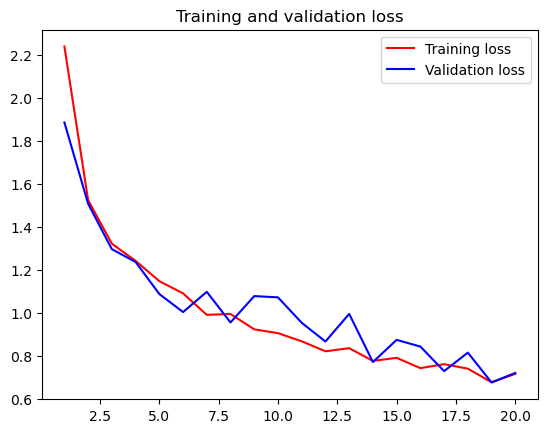

In [67]:
# plot the curves for our base model
plot_curves(hist_15)

In [68]:
model_15.evaluate(test_ds)

11/11 [==============================] - 8s 638ms/step - loss: 0.7281 - accuracy: 0.7504


[0.7281271815299988, 0.7503852248191833]

# Model 16 - Bad 

In [69]:
inputs = keras.Input(shape=(150, 150, 3))
x = layers.Rescaling(1./255)(inputs)

x = layers.Conv2D(32, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(64, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(128, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Conv2D(256, (3, 3), activation="relu", padding = 'same', kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
x = layers.MaxPooling2D(2, 2)(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation = "relu", kernel_regularizer = keras.regularizers.L1L2())(x)
x = layers.Dropout(0.2)(x)
outputs = layers.Dense(5, activation="softmax")(x)
model_16 = keras.Model(inputs, outputs)

In [70]:
model_16.compile(loss="categorical_crossentropy",
             metrics=["accuracy"],
             optimizer="rmsprop")

hist_16 = model_16.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
48/48 [==============================] - 219s 4s/step - loss: 2.6058 - accuracy: 0.3041 - val_loss: 1.5441 - val_accuracy: 0.3205
Epoch 2/20
48/48 [==============================] - 216s 4s/step - loss: 1.3483 - accuracy: 0.4243 - val_loss: 1.2674 - val_accuracy: 0.4700
Epoch 3/20
48/48 [==============================] - 189s 4s/step - loss: 1.3207 - accuracy: 0.4803 - val_loss: 1.1870 - val_accuracy: 0.5917
Epoch 4/20
48/48 [==============================] - 187s 4s/step - loss: 1.1422 - accuracy: 0.5548 - val_loss: 1.0656 - val_accuracy: 0.6487
Epoch 5/20
48/48 [==============================] - 191s 4s/step - loss: 1.0728 - accuracy: 0.5757 - val_loss: 1.2264 - val_accuracy: 0.4977
Epoch 6/20
48/48 [==============================] - 255s 5s/step - loss: 1.0141 - accuracy: 0.6019 - val_loss: 1.0632 - val_accuracy: 0.5778
Epoch 7/20
48/48 [==============================] - 276s 6s/step - loss: 0.9765 - accuracy: 0.6078 - val_loss: 0.9190 - val_accuracy: 0.6656
Epoch 8/20
48

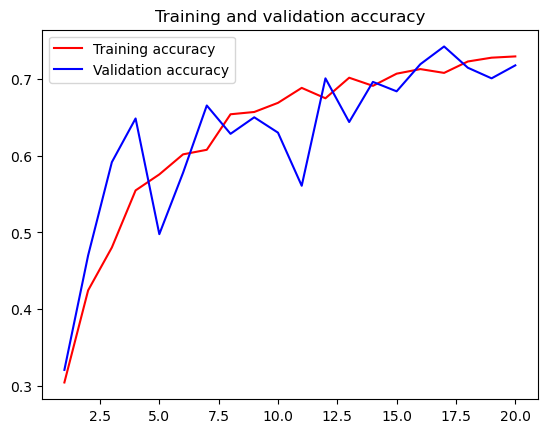

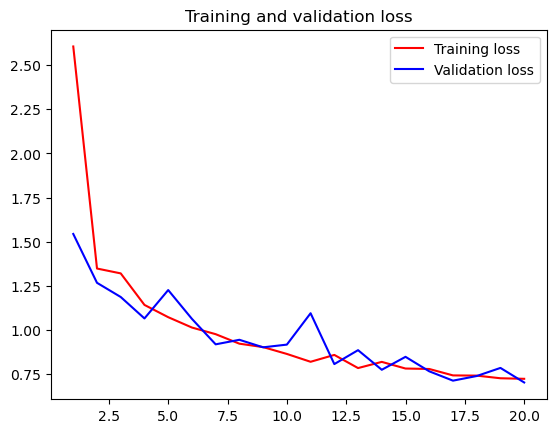

In [71]:
# plot the curves for our base model
plot_curves(hist_16)

In [72]:
model_16.evaluate(test_ds)

11/11 [==============================] - 8s 632ms/step - loss: 0.7216 - accuracy: 0.7288


[0.7216274738311768, 0.7288135886192322]

In [ ]:
# Consider tf.keras.layers.Attention() - inbetween conv and pooling 